## Imports

In [7]:
import os
import sys
module_path = os.path.abspath(os.path.join('../regex'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
import re
import helper
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Dataframe Reversoes

In [41]:
files = helper.get_files_path("../data/dodfs_txt_barra_n/")
rets_final = helper.extract_multiple(files, "reversoes", True, "../results/")
rets_final

,Tipo do Ato,SEI,Nome,Matricula,Cargo,Classe,Padrao,Quadro,Fundamento Legal,Orgao,Vigencia,Matricula SIAPE
0,Reversão,082.012894/1994,a servidora MARIA HELENA FERNANDES VIANA,60.905-6,Auxiliar de Educacao/Conservacao e Limpeza,Unica,11,Quadro de Pessoal do Distrito Federal,"artigo 34, inciso I, da Lei Complementar no 84...",Distrito Federal,nan,nan
1,Reversão,080.001995/2006,a servidora NILVA DE JESUS MEIRELLES,32.299-7,\nProfessor,A,nan,Quadro de Pessoal do Distrito Federal,"artigo 34, inciso II, da Lei Complementar no 8...",Distrito Federal,nan,nan
2,Reversão,00060-00467506/2018-19,a GUSTAVO CIPRIANO GUIMERANS,154.355-5,Medico -Ginecologia e Obstetricia,nan,III,Quadro\nde Pessoal da Secretaria de Estado de ...,"artigo 34, Inciso I e II, da Lei Complementar ...",Secretaria de Estado de Saude do Distrito Fed...,nan,nan
3,Reversão,10.887/2004,a servidora DIRCE MARIA NOGUEIRA DA CRUZ COELHO,159.614-,nan,nan,I,Quadro de Pessoal da Secretaria\nde Estado de ...,"artigo 34, Inciso II, da Lei Complementar no 8...",Secretaria\nde Estado de Saude do Distrito Fe...,nan,nan
4,Reversão,00410-00020958/2017-51,a servidora CLAUDIA GLAETE DE ARAUJO DA CRUZ,204.995-3,Professor de Educacao Basica,nan,17,Quadro de Pessoal do Distrito Federal,"artigo 34, inciso I, da Lei Complementar no 84...",Distrito Federal,nan,nan
5,Reversão,080.003053/2007,a servidora ANA PAULA FARIA DOS REIS,38.175-6,Professor,C,nan,Quadro de Pessoal\ndo Distrito Federal,"artigo 34, inciso I, da Lei Complementar no 84...",Distrito Federal,nan,nan
6,Reversão,00052-00002785/2019-31,SIMOES DOS SANTOS,58.462-1,nan,Especial,nan,nan,nan,nan,nan,nan
7,Reversão,410.000455/2017,servidora SINARA DE CAMPOS SOUZA,300.368-X,Professor de Educacao Basica,nan,23,Quadro de Pessoal do Distrito Federal,"artigo 34, inciso I, da Lei Complementar no 84...",Distrito Federal,nan,nan
8,Reversão,00040-\n00023788/2019-00,a DEIBDIANE GOMES DE MIRANDA CORTE,1.661.756-8,Tecnico em Saude - TECNICO EM\nENFERMAGEM,nan,VI,Quadro de Pessoal da Secretaria de Estado de S...,"artigo 34, Inciso I e II, da Lei Complementar ...",Secretaria de Estado de Saude\ndo Distrito Fe...,nan,nan
9,Reversão,00410-00021202/2017-29,a servidora LIANA DA SILVA GAMARRA,205.635-6,Professor de Educacao Basica,nan,15,Quadro de\nPessoal do Distrito Federal,"Artigo 34, inciso II, da Lei Complementar no 8...",Distrito Federal,nan,nan


# Análise

In [ ]:
def plot_prop(labels, sizes):
    fig1, ax1 = plt.subplots(figsize=(10,10))
    cor = ['#1b9aaa', '#06d6a0']
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=cor)
    ax1.axis("equal")
    ax1.legend(labels, title="Presença", 
            loc='center left', 
            bbox_to_anchor=(1.3, 0, 0.5, 1))
    plt.show()

## Nome

In [13]:
presence_name = rets_final["Nome"].value_counts()
total = rets_final.count()
presence_name[0]
total[0]

30

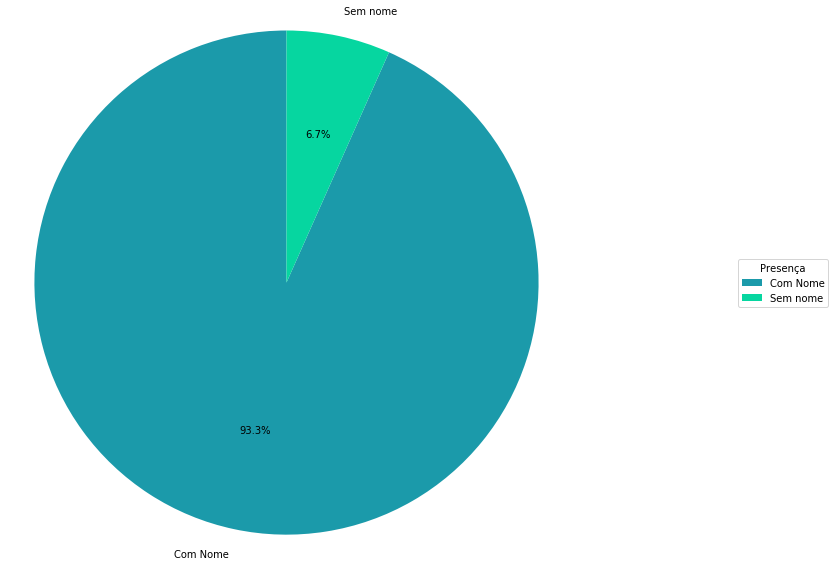

In [15]:
labels = ["Com Nome", "Sem nome"]
sizes = [total[0] - presence_name[0], presence_name[0]]
plot_prop(labels, sizes)

## Matrícula 

In [17]:
presence_registration = rets_final["Matrícula"].value_counts()
presence_registration
wrong_registrations = 0
for i in range(0, 5):
    wrong_registrations += presence_registration[i]
    
wrong_registrations

KeyError: 'Matrícula'

In [20]:
labels = ["Com Matrícula", "Sem Matrícula"]
sizes = [total[3] - wrong_registrations, wrong_registrations]
plot_prop(labels, sizes)

NameError: name 'wrong_registrations' is not defined

## Cargo

In [23]:
presence_role = rets_final["Cargo"].value_counts()
presence_role[2]
total[5]

30

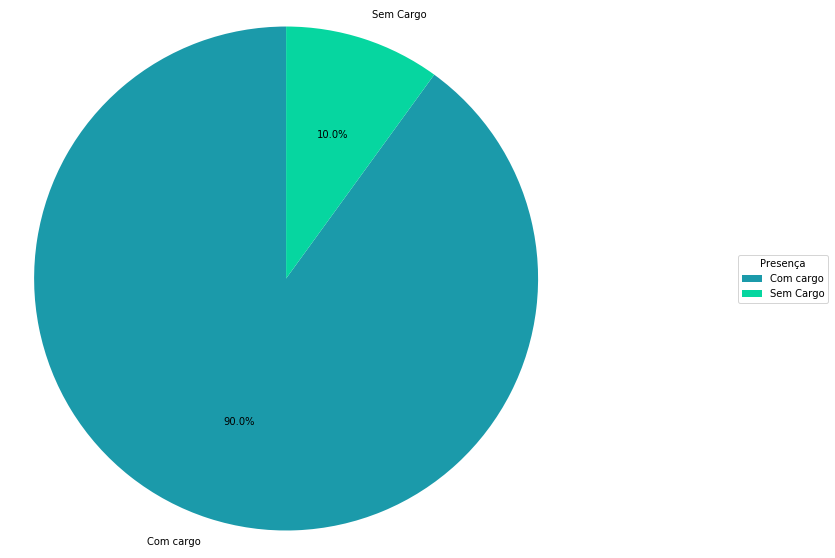

In [25]:
labels = ["Com cargo", "Sem Cargo"]
sizes = [total[5] - presence_role[2], presence_role[2]]
plot_prop(labels, sizes)

## Quadro

In [27]:
presence_board = rets_final["Quadro"].value_counts()
total[8] 

all_keys = presence_board.keys()
for i in range(0, len(all_keys)):
    if all_keys[i] == "nan":
        index = i
presence_board[index]

2

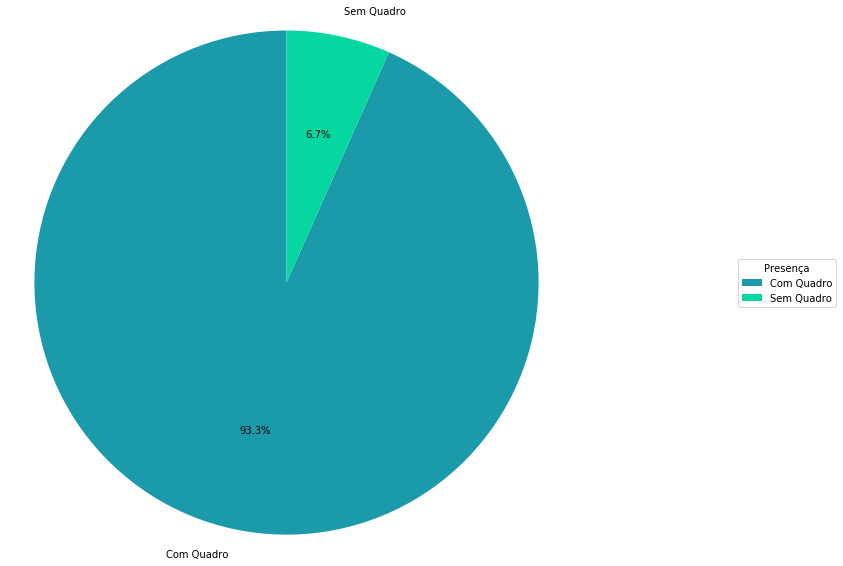

In [29]:
labels = ["Com Quadro", "Sem Quadro"]
sizes = [total[8] - presence_board[index], presence_board[index]]
plot_prop(labels, sizes)

## Fundamento Legal

In [31]:
presence_legal_foundation = rets_final["Fundamento Legal"].value_counts()
total[7]
presence_legal_foundation[0]

13

In [ ]:
labels = ["Com Fundamento ", "Sem Fundamento"]
sizes = [total[7] - presence_legal_foundation[0], presence_legal_foundation[0]]
plot_prop(labels, sizes)

## Órgão

In [34]:
presence_agency = rets_final["Orgao"].value_counts()
presence_agency[1]
none = total[0] - total[10]
wrong = none + presence_agency[1]

In [ ]:
labels = ["Com Órgão ", "Sem Órgão"]
sizes = [total[0] - wrong, wrong]
plot_prop(labels, sizes)

## Processo GDF/SEI

In [37]:
presence_process = rets_final["SEI"].value_counts()
total[1]
index_2 = 0
all_keys = presence_process.keys()
for i in range(0, len(all_keys)):
    if all_keys[i] == "nan":
        index_2 = i
nan = presence_process[index_2]
nan

2

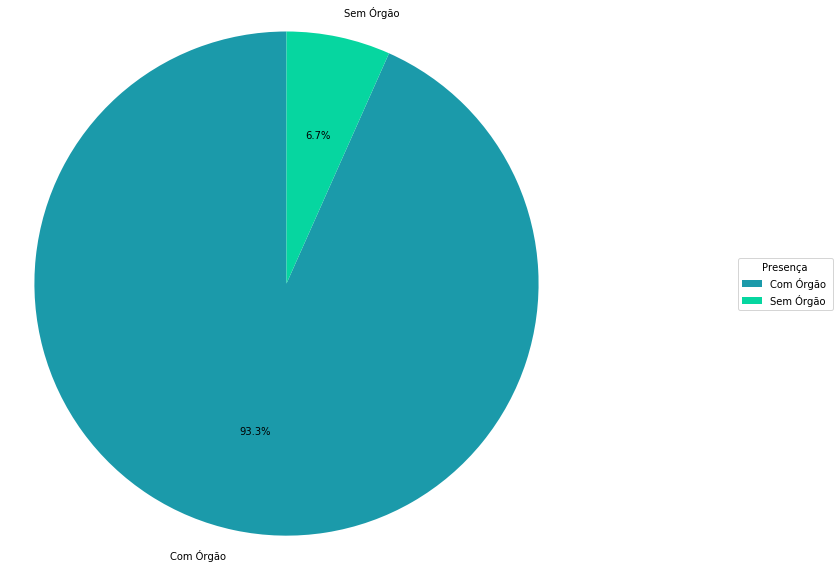

In [38]:
sizes = [total[1] - nan, nan]
plot_prop(labels, sizes)

# Tabela Resumo

In [39]:
def percentage(num1, num2):
    percentage = '{0:.1f}'.format((num1 / num2 * 100))
    return percentage

percentages = [percentage(total[0] - presence_name[0], total[0]), 
               percentage(total[3] - wrong_registrations, total[0]),
               percentage(total[5] - presence_role[2], total[0]),
               percentage(total[8] - presence_board[index], total[0]),
               percentage(total[7] - presence_legal_foundation[0], total[0]),
               percentage(total[0] - wrong, total[0]),
               percentage(total[1] - nan, total[0]),
              ]

NameError: name 'wrong_registrations' is not defined

In [40]:
atos = ["Nome", "Matrícula", "Cargo", "Quadro", "Fundamento", "Órgão","SEI"]

percentage_table ={"Atos": atos, "% de presença": percentages}

percentage_table = pd.DataFrame(percentage_table).style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align','left')] ) ])
percentage_table

NameError: name 'percentages' is not defined